In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
 
# 데이터 불러오기
iris = load_iris()
 
#dataframe으로 변경
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
 
#타겟 추가
iris_df['species'] = iris.target

In [9]:
iris_df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

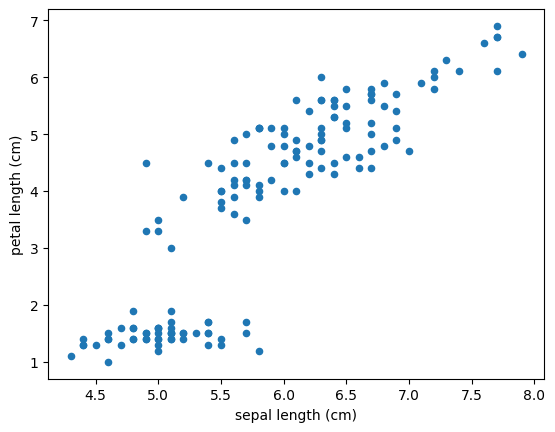

In [11]:
iris_df.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)') 

In [13]:
# X,y 나누기
X = iris_df.iloc[:,:4]
y = iris_df['species']

In [14]:
# train-test 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [16]:
# DT 생성
dtmodel = DecisionTreeClassifier(random_state=11)
dtmodel.fit(X_train, y_train)
score = dtmodel.score(X_test, y_test)
score

0.8947368421052632

### 1. 하이퍼 파라미터 조정

In [21]:
# train-test 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [33]:
# CV 크로스 밸리데이션

from sklearn.model_selection import cross_val_score, GridSearchCV

cross_acc = cross_val_score(dtmodel, X_train, y_train, cv=3)
cross_acc

array([0.9  , 0.925, 1.   ])

In [34]:
param_grid = {'max_depth':[3,5,7],'min_samples_split':[2,3,4]}
gr_search = GridSearchCV(DecisionTreeClassifier(random_state=11), param_grid, cv=3)
gr_search

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 3, 4]})

In [35]:
gr_search.fit(X,y)
gr_search.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [36]:
gr_search.best_score_

np.float64(0.9733333333333333)

# 랜덤 포레스트


In [32]:
from sklearn.ensemble import RandomForestClassifier 

 

rf = RandomForestClassifier() 

rf.fit(X_train, y_train) 

rf.score(X_test, y_test) 

 

0.9333333333333333